In [393]:
# Peruskirjastojen avaaminen

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('seaborn-pastel')


In [394]:
# Avataan data dataframeen, nimeän sen df1 selkeyden vuoksi

df1 = pd.read_excel('http://taanila.fi/titanic.xlsx')
df1.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [395]:
# Droppaan sellaiset sarakkeet, mitä en usko tarvitsevani tässä

df1 = df1.drop(['sibsp', 'parch', 'ticket', 'embarked', 'boat'], axis=1)
df1.head()

,pclass,survived,name,sex,age,fare,cabin,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,211.3375,B5,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,151.5500,C22 C26,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,151.5500,C22 C26,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,151.5500,C22 C26,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,151.5500,C22 C26,NaN,"Montreal, PQ / Chesterville, ON"


In [396]:
# Haluan tässä nimetä matkustajaluokat ja teen selviyteneille myös tekstiversion.

df1['Class']=df1['pclass'].replace({1:'First', 2:'Second', 3:'Third'})
df1['Survived_YN']=df1['survived'].replace({0:'No', 1:'Yes'})
df1.head()

,pclass,survived,name,sex,age,fare,cabin,body,home.dest,Class,Survived_YN
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,211.3375,B5,NaN,"St Louis, MO",First,Yes
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,151.5500,C22 C26,NaN,"Montreal, PQ / Chesterville, ON",First,Yes
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,151.5500,C22 C26,NaN,"Montreal, PQ / Chesterville, ON",First,No
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,151.5500,C22 C26,135.0,"Montreal, PQ / Chesterville, ON",First,No
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,151.5500,C22 C26,NaN,"Montreal, PQ / Chesterville, ON",First,No


In [397]:
# Tässä järjestän sarakkeet uudelleen itselleni sopivampaan järjestykseen

df1 = df1[['Class', 'pclass', 'Survived_YN', 'survived', 'age', 'sex', 'name', 'fare', 'cabin', 'body', 'home.dest']]
df1.head()

,Class,pclass,Survived_YN,survived,age,sex,name,fare,cabin,body,home.dest
0,First,1,Yes,1,29.0000,female,"Allen, Miss. Elisabeth Walton",211.3375,B5,NaN,"St Louis, MO"
1,First,1,Yes,1,0.9167,male,"Allison, Master. Hudson Trevor",151.5500,C22 C26,NaN,"Montreal, PQ / Chesterville, ON"
2,First,1,No,0,2.0000,female,"Allison, Miss. Helen Loraine",151.5500,C22 C26,NaN,"Montreal, PQ / Chesterville, ON"
3,First,1,No,0,30.0000,male,"Allison, Mr. Hudson Joshua Creighton",151.5500,C22 C26,135.0,"Montreal, PQ / Chesterville, ON"
4,First,1,No,0,25.0000,female,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",151.5500,C22 C26,NaN,"Montreal, PQ / Chesterville, ON"


In [398]:
# Katsotaan nopeasti tunnusluvut. En tiedä mitä 'body' sarakkeen arvot tarkoittavat, mutta oletan että jos arvo löytyy,
# tarkoittaa se, että ruums on löydetty
 
df1.describe()

,pclass,survived,age,fare,body
count,1309.000000,1309.000000,1046.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,33.295479,160.809917
std,0.837836,0.486055,14.413500,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,1.000000
25%,2.000000,0.000000,21.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,512.329200,328.000000


In [399]:
# Ristiintaulukointi selvinneistä matkustajaluokkaan nähden

df2 = pd.crosstab(df1['Class'], df1['Survived_YN'])
df2

Survived_YN,No,Yes
Class,,
First,123,200
Second,158,119
Third,528,181


In [400]:
# Sama taulukko esitettynä prosentteina. Prosenteista voidaan nähdä, että suurin osa kuolleista oli kolmannen luokan
# matkustajia.

df2 = pd.crosstab(df1['Class'], df1['Survived_YN'], normalize='columns')

no = df1['Class'][df1['survived']==0].count()
yes = df1['Class'][df1['survived']==1].count()

df2.columns = ['No, n=' + str(no), 'Yes, n=' + str(yes)]

(df2*100).style.format('{:.1f} %')

,"No, n=809","Yes, n=500"
Class,,
First,15.2 %,40.0 %
Second,19.5 %,23.8 %
Third,65.3 %,36.2 %


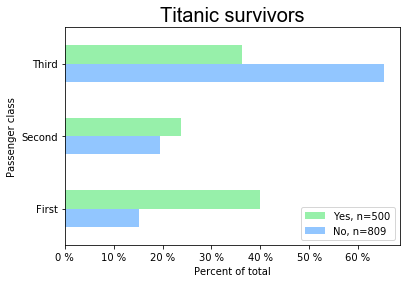

In [401]:
# Eka graafi datasta. Esitetään edellinen ristiintaulukointa vaakapylväinä ja pientä muotoilua ulkoasuun. 

ax1 = df2.plot.barh(legend='reverse')

ax1.set_title('Titanic survivors', fontname='Arial', fontsize=20)

ax1.set_xlabel('Percent of total')
ax1.set_ylabel('Passenger class')

ax1.set_xticklabels(['{:.0f} %'.format(x*100) for x in ax1.get_xticks()])

ax1

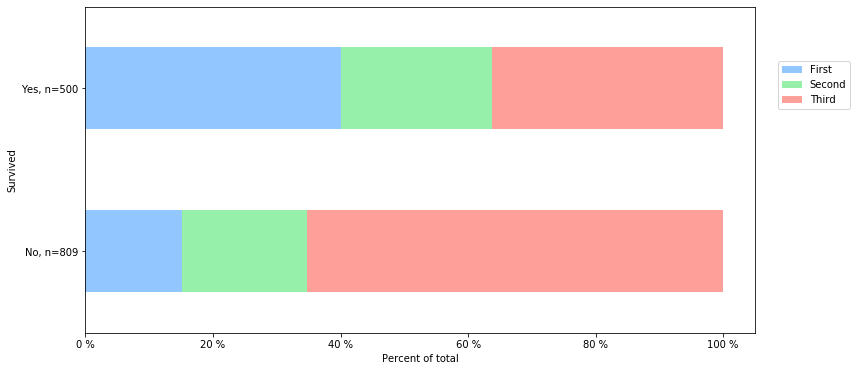

In [402]:
# Toinen graafi.

# Tässä määritän kuvaajan koon
plt.rcParams["figure.figsize"] = [12,6]

# Kuvaajan tyyli, tässä stacked bars
ax2 = df2.T.plot.barh(stacked=True)

# Annan nimet akseleille
ax2.set_xlabel('Percent of total')
ax2.set_ylabel('Survived')

# Tässä muotoillaan x-labels
ax2.set_xticklabels(['{:.0f} %'.format(x*100) for x in ax2.get_xticks()])

# Selitteen boksin paikan hakua. Tällä kertaa asettelin boksin kuvaajan ulkopuolelle, en tiedä onko se visuaalisesti
# paras mahdollinen ratkaisu, mutta tämä on nyt kokeilua vielä. bbox_to_anchor määrittää boksin pysyvän paikan ja sen
# pitäisi skaalautua siihen tulevan tavaran mukaan..

legend_x = 1.15
legend_y = 0.85
plt.legend(loc='upper right', bbox_to_anchor=(legend_x, legend_y))

ax2

In [403]:
# Khiin neliötesti matkustajaluokan ja selviytymisen riippuvuudesta. Tulos on 1.7208259588256175e-28 joka on aikalailla
# pienempi luku kuin 0,05. Näin ollen testin perusteella on selvää, että matkustajaluokan ja selviytymisen välillä on
# selkeä riippuvuussuhde.

# Tuodaan khiin neliötesti

from scipy.stats import chi2_contingency

chi2_contingency(pd.crosstab(df1['pclass'], df1['survived']))

(127.85915643930326,
 1.7208259588256175e-28,
 2,
 array([[199.62337662, 123.37662338],
        [171.19404125, 105.80595875],
        [438.18258212, 270.81741788]]))

In [404]:
# Virkistelen muistia

df1.head()

,Class,pclass,Survived_YN,survived,age,sex,name,fare,cabin,body,home.dest
0,First,1,Yes,1,29.0000,female,"Allen, Miss. Elisabeth Walton",211.3375,B5,NaN,"St Louis, MO"
1,First,1,Yes,1,0.9167,male,"Allison, Master. Hudson Trevor",151.5500,C22 C26,NaN,"Montreal, PQ / Chesterville, ON"
2,First,1,No,0,2.0000,female,"Allison, Miss. Helen Loraine",151.5500,C22 C26,NaN,"Montreal, PQ / Chesterville, ON"
3,First,1,No,0,30.0000,male,"Allison, Mr. Hudson Joshua Creighton",151.5500,C22 C26,135.0,"Montreal, PQ / Chesterville, ON"
4,First,1,No,0,25.0000,female,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",151.5500,C22 C26,NaN,"Montreal, PQ / Chesterville, ON"


In [405]:
# Onko iän ja selviytymisen välillä riippuvuutta? Tulos on 0.029131950741358062 joka on pienempi kuin 0,05, muttei paljoa.

chi2_contingency(pd.crosstab(df1['survived'], df1['age']))

(125.04652842023077,
 0.029131950741358062,
 97,
 array([[ 0.5917782 ,  0.5917782 ,  0.5917782 ,  0.5917782 ,  1.77533461,
          1.77533461,  1.18355641,  5.91778203,  7.10133843,  4.14244742,
          5.91778203,  2.95889101,  3.55066922,  2.36711281,  3.55066922,
          5.91778203,  2.36711281,  2.36711281,  0.5917782 ,  1.77533461,
          2.95889101,  4.73422562,  1.18355641,  3.55066922, 11.24378585,
         11.83556405, 23.0793499 ,  1.77533461, 17.16156788, 13.61089866,
          0.5917782 , 24.26290631, 25.44646272,  0.5917782 , 15.38623327,
          0.5917782 , 27.81357553,  0.5917782 , 20.12045889, 17.75334608,
          0.5917782 , 17.75334608, 18.93690249,  1.77533461, 17.75334608,
         23.67112811,  1.18355641, 13.61089866, 14.20267686,  2.36711281,
         12.42734226,  9.46845124,  1.18355641, 13.61089866, 18.34512428,
          1.18355641,  5.32600382,  8.28489484,  0.5917782 , 11.83556405,
         10.65200765,  1.77533461,  6.50956023, 10.65200765,  5

In [406]:
# Muutan sukupuolen arvot niin, että niillä on iso alkukirjain. Huvikseen ja myös siisteyden vuoksi.

df1.replace({'female': 'Female', 'male': 'Male'}, inplace=True)
df1.head()

,Class,pclass,Survived_YN,survived,age,sex,name,fare,cabin,body,home.dest
0,First,1,Yes,1,29.0000,Female,"Allen, Miss. Elisabeth Walton",211.3375,B5,NaN,"St Louis, MO"
1,First,1,Yes,1,0.9167,Male,"Allison, Master. Hudson Trevor",151.5500,C22 C26,NaN,"Montreal, PQ / Chesterville, ON"
2,First,1,No,0,2.0000,Female,"Allison, Miss. Helen Loraine",151.5500,C22 C26,NaN,"Montreal, PQ / Chesterville, ON"
3,First,1,No,0,30.0000,Male,"Allison, Mr. Hudson Joshua Creighton",151.5500,C22 C26,135.0,"Montreal, PQ / Chesterville, ON"
4,First,1,No,0,25.0000,Female,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",151.5500,C22 C26,NaN,"Montreal, PQ / Chesterville, ON"


In [407]:
# Taulukointi miesten ja naisten määrästä eri matkustajaluokissa. Käytän marginsia tuomaan yhteenlasketut määrät.

df3 = pd.crosstab(df1['Class'], df1['sex'], margins=True, margins_name='Total')

df3

sex,Female,Male,Total
Class,,,
First,144,179,323
Second,106,171,277
Third,216,493,709
Total,466,843,1309


In [408]:
# Tarkistan sarakkeet

cols = df3.columns.tolist()
cols

['Female', 'Male', 'Total']

In [409]:
# Tarkistan sukupuolten frekvenssit

df1['sex'].value_counts()

Male      843
Female    466
Name: sex, dtype: int64

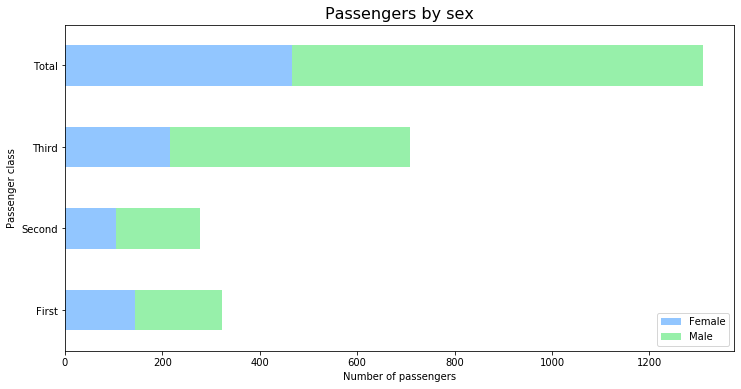

In [410]:
# Grafiikka matkustajien sukupuolijakaumasta sekä matkustajaluokissa, että koko laivalla. Alussa droppaan Total-sarakkeen,
# koska se tulisi muuten kolmantena arvona sukupuoleen grafiikassa.

df3 = df3.drop('Total', axis=1)

ax3 = df3.plot.barh(legend='reverse', stacked=True)

ax3.set_title('Passengers by sex', fontsize=16)
ax3.set_xlabel('Number of passengers')
ax3.set_ylabel('Passenger class')

legend_x = 1.15
legend_y = 0.85
plt.legend(loc='lower right')


In [411]:
# Muistelua, ettei tarvitse kelailla alkuun.

df1.head()

,Class,pclass,Survived_YN,survived,age,sex,name,fare,cabin,body,home.dest
0,First,1,Yes,1,29.0000,Female,"Allen, Miss. Elisabeth Walton",211.3375,B5,NaN,"St Louis, MO"
1,First,1,Yes,1,0.9167,Male,"Allison, Master. Hudson Trevor",151.5500,C22 C26,NaN,"Montreal, PQ / Chesterville, ON"
2,First,1,No,0,2.0000,Female,"Allison, Miss. Helen Loraine",151.5500,C22 C26,NaN,"Montreal, PQ / Chesterville, ON"
3,First,1,No,0,30.0000,Male,"Allison, Mr. Hudson Joshua Creighton",151.5500,C22 C26,135.0,"Montreal, PQ / Chesterville, ON"
4,First,1,No,0,25.0000,Female,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",151.5500,C22 C26,NaN,"Montreal, PQ / Chesterville, ON"


In [412]:
# Teen matkustajille ikäluokittelun. Osalla matkustajista ei ole ikää, tästä tulee pieni ongelma myöhemmin. Iät ovat myös
# esitetty desimaaleina, mutta se ei sinänsä haittaa.

bins = [0, 8, 16, 24, 32, 42, 52, 62, 72, 90]
names = ['0 - 8', '9 - 16', '17 - 24', '25 - 32', '33 - 42', '43 - 52', '53 - 62', '63 - 72', '73 - 90']

# Sain ikäongelman ikäänkuin ratkaistua. Labelit täytyvät olla str-objekti, jotta voin myöhemmässä vaiheessa korvata
# Nan-arvon. Stringiksi muutettuna Age_Class esittää puuttuvan arvon nan-stringinä. Tämä korvataan myöhemmin sanalla Unknown.

df1['Age_Class']=pd.cut(df1['age'], bins=bins, labels=names).astype(str)
df1.head(20)

,Class,pclass,Survived_YN,survived,age,sex,name,fare,cabin,body,home.dest,Age_Class
0,First,1,Yes,1,29.0000,Female,"Allen, Miss. Elisabeth Walton",211.3375,B5,NaN,"St Louis, MO",25 - 32
1,First,1,Yes,1,0.9167,Male,"Allison, Master. Hudson Trevor",151.5500,C22 C26,NaN,"Montreal, PQ / Chesterville, ON",0 - 8
2,First,1,No,0,2.0000,Female,"Allison, Miss. Helen Loraine",151.5500,C22 C26,NaN,"Montreal, PQ / Chesterville, ON",0 - 8
3,First,1,No,0,30.0000,Male,"Allison, Mr. Hudson Joshua Creighton",151.5500,C22 C26,135.0,"Montreal, PQ / Chesterville, ON",25 - 32
4,First,1,No,0,25.0000,Female,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",151.5500,C22 C26,NaN,"Montreal, PQ / Chesterville, ON",25 - 32
5,First,1,Yes,1,48.0000,Male,"Anderson, Mr. Harry",26.5500,E12,NaN,"New York, NY",43 - 52
6,First,1,Yes,1,63.0000,Female,"Andrews, Miss. Kornelia Theodosia",77.9583,D7,NaN,"Hudson, NY",63 - 72
7,First,1,No,0,39.0000,Male,"Andrews, Mr. Thomas Jr",0.0000,A36,NaN,"Belfast, NI",33 - 42
8,First,1,Yes,1,53.0000,Female,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",51.4792,C101,NaN,"Bayside, Queens, NY",53 - 62
9,First,1,No,0,71.0000,Male,"Artagaveytia, Mr. Ramon",49.5042,NaN,22.0,"Montevideo, Uruguay",63 - 72


In [413]:
# Järjestän sarakkeet

df1 = df1[['Class', 'pclass', 'Survived_YN', 'survived', 'Age_Class', 'age', 'sex', 'name', 'fare', 'cabin', 'body', 'home.dest']]
df1.head()

,Class,pclass,Survived_YN,survived,Age_Class,age,sex,name,fare,cabin,body,home.dest
0,First,1,Yes,1,25 - 32,29.0000,Female,"Allen, Miss. Elisabeth Walton",211.3375,B5,NaN,"St Louis, MO"
1,First,1,Yes,1,0 - 8,0.9167,Male,"Allison, Master. Hudson Trevor",151.5500,C22 C26,NaN,"Montreal, PQ / Chesterville, ON"
2,First,1,No,0,0 - 8,2.0000,Female,"Allison, Miss. Helen Loraine",151.5500,C22 C26,NaN,"Montreal, PQ / Chesterville, ON"
3,First,1,No,0,25 - 32,30.0000,Male,"Allison, Mr. Hudson Joshua Creighton",151.5500,C22 C26,135.0,"Montreal, PQ / Chesterville, ON"
4,First,1,No,0,25 - 32,25.0000,Female,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",151.5500,C22 C26,NaN,"Montreal, PQ / Chesterville, ON"


In [414]:
# Tässä kohtaa muutetaan Age_Class-sarakkeeseen saatu nan-string Unknown-stringillä.

df1.replace({'nan': 'Unknown'}, inplace=True)
df1.head(20)

,Class,pclass,Survived_YN,survived,Age_Class,age,sex,name,fare,cabin,body,home.dest
0,First,1,Yes,1,25 - 32,29.0000,Female,"Allen, Miss. Elisabeth Walton",211.3375,B5,NaN,"St Louis, MO"
1,First,1,Yes,1,0 - 8,0.9167,Male,"Allison, Master. Hudson Trevor",151.5500,C22 C26,NaN,"Montreal, PQ / Chesterville, ON"
2,First,1,No,0,0 - 8,2.0000,Female,"Allison, Miss. Helen Loraine",151.5500,C22 C26,NaN,"Montreal, PQ / Chesterville, ON"
3,First,1,No,0,25 - 32,30.0000,Male,"Allison, Mr. Hudson Joshua Creighton",151.5500,C22 C26,135.0,"Montreal, PQ / Chesterville, ON"
4,First,1,No,0,25 - 32,25.0000,Female,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",151.5500,C22 C26,NaN,"Montreal, PQ / Chesterville, ON"
5,First,1,Yes,1,43 - 52,48.0000,Male,"Anderson, Mr. Harry",26.5500,E12,NaN,"New York, NY"
6,First,1,Yes,1,63 - 72,63.0000,Female,"Andrews, Miss. Kornelia Theodosia",77.9583,D7,NaN,"Hudson, NY"
7,First,1,No,0,33 - 42,39.0000,Male,"Andrews, Mr. Thomas Jr",0.0000,A36,NaN,"Belfast, NI"
8,First,1,Yes,1,53 - 62,53.0000,Female,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",51.4792,C101,NaN,"Bayside, Queens, NY"
9,First,1,No,0,63 - 72,71.0000,Male,"Artagaveytia, Mr. Ramon",49.5042,NaN,22.0,"Montevideo, Uruguay"


In [415]:
# Crosstab laivan matkustajien ikäjakaumasta. Kaikkien ikä ei ollut tiedossa, mutta aiemmin tehty tyyppimuutos auttaa tässä.
# 9 - 16 luokka menee väärään paikkaan, johtuen tuosta numerosta 9.. En osannut sortata tätä oikein.

df4 = pd.crosstab(df1['Survived_YN'], df1['Age_Class'], margins=True).sort_values('Age_Class', axis=1)
df4

Age_Class,0 - 8,17 - 24,25 - 32,33 - 42,43 - 52,53 - 62,63 - 72,73 - 90,9 - 16,All,Unknown
Survived_YN,,,,,,,,,,,
No,26,171,156,119,64,33,15,1,34,809,190
Yes,46,103,94,74,50,26,4,2,28,500,73
All,72,274,250,193,114,59,19,3,62,1309,263


In [416]:
# Tässä crosstab jossa esitetään ikäluokkien osuus kaikista matkustajista määrällisesti ja prosentuaalisesti

df5 = pd.crosstab(df1['Age_Class'], 'Count')
df5.columns.name = ''

n = df5['Count'].sum()
df5['%'] = df5/n*100

df5.style.format({'%': '{:.1f} %'})

df5

,Count,%
Age_Class,,
0 - 8,72,5.500382
17 - 24,274,20.932009
25 - 32,250,19.098549
33 - 42,193,14.744079
43 - 52,114,8.708938
53 - 62,59,4.507257
63 - 72,19,1.451490
73 - 90,3,0.229183
9 - 16,62,4.736440


In [417]:
# Tässä vaiheessa päätin, että jatkan seuraavana päivänä. Alkoi jo päätä särkeä.

In [418]:
# Aloitellaan kevyesti tutkaisemalla matkojen hintaa per sukupuoli. Tämä kertoisi, että naisen maksoivat matkastaan
# keskimääräisesti enemmän kuin miehet.

df1.groupby('sex')['fare'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,466.0,46.20,63.29,6.75,10.50,23.00,55.33,512.33
Male,842.0,26.15,42.49,0.00,7.88,11.89,26.55,512.33


In [419]:
# Tässä näkyy groupbylla sukupuolijakauma. Kertoo näemmä määrän ja moodin, joka on Male kaikissa ikäluokissa.

df1.groupby('Age_Class')['sex'].describe()

,count,unique,top,freq
Age_Class,,,,
0 - 8,72,2,Male,38
17 - 24,274,2,Male,166
25 - 32,250,2,Male,173
33 - 42,193,2,Male,125
43 - 52,114,2,Male,71
53 - 62,59,2,Male,37
63 - 72,19,2,Male,14
73 - 90,3,2,Male,2
9 - 16,62,2,Male,32


Text(0, 0.5, 'Paid Fare')

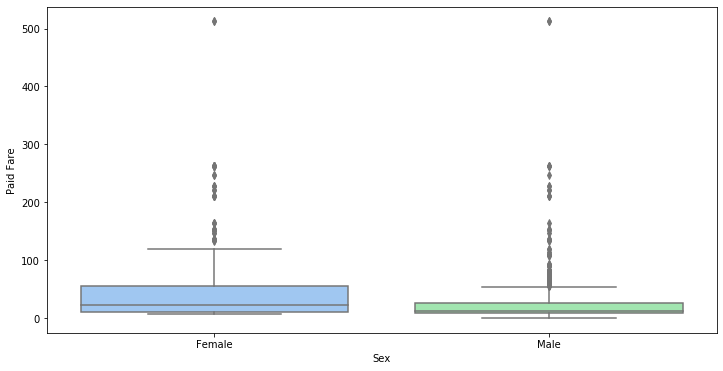

In [420]:
# Boxplotin harjoittelua. Datasta löytyy paljon poikkeamia, ja kiinnostavasti sieltä löytyykin poikkeama kalliimmassa
# päässä. Aiemmista tunnusluvuista tiedetään että korkein maksettu määrä matkasta on hieman yli 512..dollaria?

ax4 = sns.boxplot(x='sex', y='fare', data=df1)

ax4.set_xlabel('Sex')
ax4.set_ylabel('Paid Fare')

In [421]:
# Matkustajat jotka olivat maksaneet eniten matkastaan. Kyseiset matkustajat löytyvät netistäkin.

df1.loc[df1['fare'] > 500]

,Class,pclass,Survived_YN,survived,Age_Class,age,sex,name,fare,cabin,body,home.dest
49,First,1,Yes,1,33 - 42,36.0,Male,"Cardeza, Mr. Thomas Drake Martinez",512.3292,B51 B53 B55,NaN,"Austria-Hungary / Germantown, Philadelphia, PA"
50,First,1,Yes,1,53 - 62,58.0,Female,"Cardeza, Mrs. James Warburton Martinez (Charlo...",512.3292,B51 B53 B55,NaN,"Germantown, Philadelphia, PA"
183,First,1,Yes,1,33 - 42,35.0,Male,"Lesurer, Mr. Gustave J",512.3292,B101,NaN,NaN
302,First,1,Yes,1,33 - 42,35.0,Female,"Ward, Miss. Anna",512.3292,NaN,NaN,NaN


In [422]:
Sex_list = ['Female', 'Male']

In [423]:
# Tässä pivotilla tehty matkalipun hintojen keskiarvotaulukko sukupuolittain ja ikäluokittain.

df6 = df1.pivot_table(values='fare', index='Age_Class', columns='sex', margins=True).round(2)

df6

sex,Female,Male,All
Age_Class,,,
0 - 8,26.74,32.96,30.02
17 - 24,38.29,20.26,27.37
25 - 32,43.34,20.75,27.71
33 - 42,69.04,31.21,44.54
43 - 52,66.99,40.73,50.63
53 - 62,92.32,48.90,65.37
63 - 72,83.81,63.73,69.01
73 - 90,78.85,18.89,38.88
9 - 16,34.46,35.29,34.89


In [424]:
# Keskiarvotilastoa ikien kohdalta. Iät luokiteltu matkustajaluokan ja sukupuolen mukaan.

df7 = df1.pivot_table(values='age', index='Class', columns='sex', margins=True).astype(int)

df7

sex,Female,Male,All
Class,,,
First,37,41,39
Second,27,30,29
Third,22,25,24
All,28,30,29


In [425]:
# T-testiä varten tuodaan kyseinen funktio scipystä ja keskustelualueen ohjeiden mukaan poistetaan puuttuvat arvot.
# Tässä testissä p-arvo on yli 0,05, muttei paljoa. Kuitenkin voidaan ajatella, ettei iällä ole selviytymisen kannalta
# merkittävää vaikutusta

df_dropna = df1.dropna(subset=['age', 'survived'])

s1 = df_dropna['age'][df_dropna['survived']==0]
s2 = df_dropna['age'][df_dropna['survived']==1]

from scipy.stats import ttest_ind

ttest_ind(s1, s2, equal_var=False)

Ttest_indResult(statistic=1.770718222605129, pvalue=0.07695838020284383)

In [426]:
# T-testi onko iän ja sukupuolen välillä merkitsevyyttä. Tässä näyttäisi olevan jonkinlainen merkitsevä vaikutus, tulos
# 0.04071760080754717 jää alle 0,05

s1 = df_dropna['age'][df_dropna['sex']=='Male']
s2 = df_dropna['age'][df_dropna['sex']=='Female']

# T-testin tuonti

from scipy.stats import ttest_ind

ttest_ind(s1, s2, equal_var=False)

Ttest_indResult(statistic=2.0497238540178113, pvalue=0.04071760080754717)

In [427]:
# F-testi suuremmalle kasalle luokkia. Onko ikäluokan ja selviytymisen välillä merkitsevyyttä? P-arvo on
# 0.002454778518794399 joten sen mukaan olisi. 

k1 = df_dropna['survived'][df_dropna['Age_Class']=='0 - 8']
k2 = df_dropna['survived'][df_dropna['Age_Class']=='9 - 16']
k3 = df_dropna['survived'][df_dropna['Age_Class']=='17 - 24']
k4 = df_dropna['survived'][df_dropna['Age_Class']=='25 - 32']
k5 = df_dropna['survived'][df_dropna['Age_Class']=='33 - 42']
k6 = df_dropna['survived'][df_dropna['Age_Class']=='43 - 52']
k7 = df_dropna['survived'][df_dropna['Age_Class']=='53 - 62']
k8 = df_dropna['survived'][df_dropna['Age_Class']=='63 - 72']
k9 = df_dropna['survived'][df_dropna['Age_Class']=='73 - 90']

from scipy.stats import f_oneway

f_oneway(k1, k2, k3, k4, k5, k6, k7, k8, k9)

F_onewayResult(statistic=3.0034333675745706, pvalue=0.002454778518794399)

In [428]:
# Onko merkitsevää eroa ikäluokan ja matkustajaluokan välillä. P-arvo on erittäin pieni, joten merkitsevyys on erittäin
# vahva.

k1 = df_dropna['pclass'][df_dropna['Age_Class']=='0 - 8']
k2 = df_dropna['pclass'][df_dropna['Age_Class']=='9 - 16']
k3 = df_dropna['pclass'][df_dropna['Age_Class']=='17 - 24']
k4 = df_dropna['pclass'][df_dropna['Age_Class']=='25 - 32']
k5 = df_dropna['pclass'][df_dropna['Age_Class']=='33 - 42']
k6 = df_dropna['pclass'][df_dropna['Age_Class']=='43 - 52']
k7 = df_dropna['pclass'][df_dropna['Age_Class']=='53 - 62']
k8 = df_dropna['pclass'][df_dropna['Age_Class']=='63 - 72']
k9 = df_dropna['pclass'][df_dropna['Age_Class']=='73 - 90']

from scipy.stats import f_oneway

f_oneway(k1, k2, k3, k4, k5, k6, k7, k8, k9)

F_onewayResult(statistic=28.12475967086584, pvalue=8.287649487677269e-40)

In [429]:
# Crosstabista voi katsoa pitääkö aiempi paikkansa. Näyttäisi nopeasti katsottuna, että mitä nuorempi sitä alemmassa
# luokassa on matkustanut. Voitasiin ajatella, että vanhemmat matkustajat ovat rikkaampia ja heillä on varaa parempaan
# matkustusluokkaan.

df_1 = pd.crosstab(df1['Class'], df1['Age_Class'])
df_1

Age_Class,0 - 8,17 - 24,25 - 32,33 - 42,43 - 52,53 - 62,63 - 72,73 - 90,9 - 16,Unknown
Class,,,,,,,,,,
First,4,42,45,67,63,41,13,2,7,39
Second,22,64,75,52,23,14,3,0,8,16
Third,46,168,130,74,28,4,3,1,47,208


In [430]:
# Droppaan body-sarakkeen, en tee sillä tässä nyt mitään

df1 = df1.drop('body', axis=1)

In [431]:
# Vaihdan sukupuolet stringeistä integeriksi korrelaation vuoksi. Olisi voinut tehdä uuden sarakkeenkin...

df1.replace({'Female': 1, 'Male': 2}, inplace=True)
df1.head()

,Class,pclass,Survived_YN,survived,Age_Class,age,sex,name,fare,cabin,home.dest
0,First,1,Yes,1,25 - 32,29.0000,1,"Allen, Miss. Elisabeth Walton",211.3375,B5,"St Louis, MO"
1,First,1,Yes,1,0 - 8,0.9167,2,"Allison, Master. Hudson Trevor",151.5500,C22 C26,"Montreal, PQ / Chesterville, ON"
2,First,1,No,0,0 - 8,2.0000,1,"Allison, Miss. Helen Loraine",151.5500,C22 C26,"Montreal, PQ / Chesterville, ON"
3,First,1,No,0,25 - 32,30.0000,2,"Allison, Mr. Hudson Joshua Creighton",151.5500,C22 C26,"Montreal, PQ / Chesterville, ON"
4,First,1,No,0,25 - 32,25.0000,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",151.5500,C22 C26,"Montreal, PQ / Chesterville, ON"


In [432]:
# Nopea tsekkaus korrelaatioista

df1.corr()

,pclass,survived,age,sex,fare
pclass,1.000000,-0.312469,-0.408106,0.124617,-0.558629
survived,-0.312469,1.000000,-0.055513,-0.528693,0.244265
age,-0.408106,-0.055513,1.000000,0.063646,0.178739
sex,0.124617,-0.528693,0.063646,1.000000,-0.185523
fare,-0.558629,0.244265,0.178739,-0.185523,1.000000


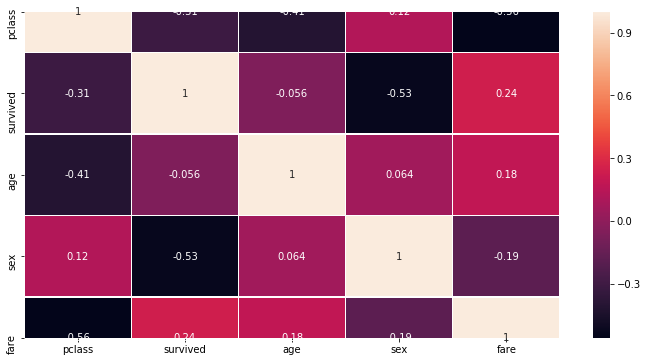

In [433]:
# Heatmap seabornilla. Kuten näkyy, katkeava ylimmät ja alimmat ruudut. Googlailin että tämä johtuu
# matplotlib versiosta 3.1.1 joka tässä minulla sattuu olemaan.

sns.heatmap(df1.corr(), annot=True, linewidths=.5)

In [1]:
# Printtaa matplotlib-version

print(plt.__version__)

NameError: name 'plt' is not defined

(5.0, 0.0)

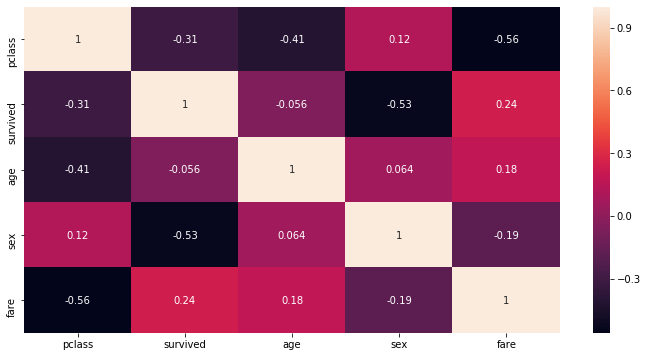

In [435]:
# Löysin netistä tavan kiertää ongelma...

df_corr = df1.corr()
ax = sns.heatmap(df_corr, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

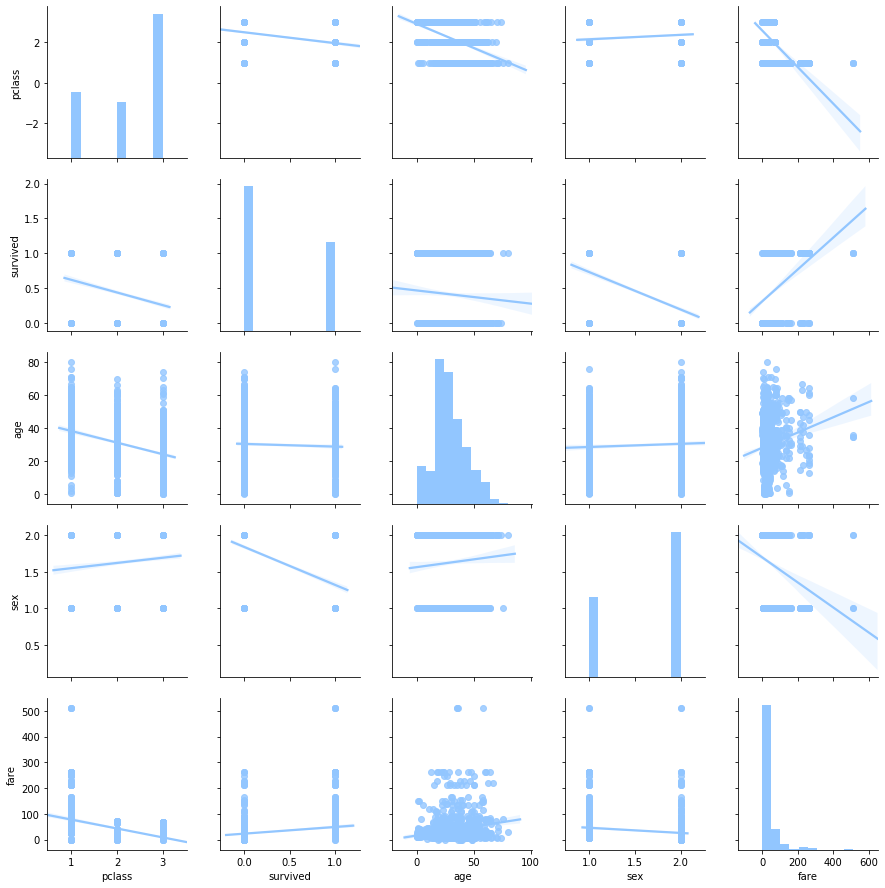

In [441]:
# Teen videon mukaan pairplotin...

sns.pairplot(df1, kind='reg')

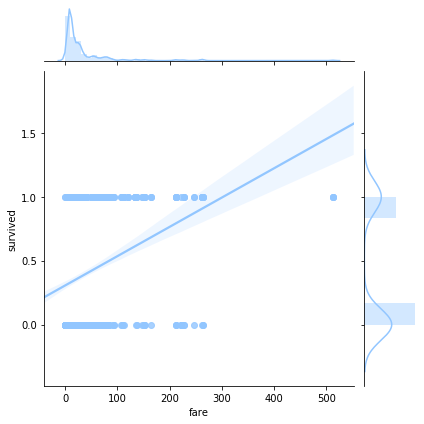

In [442]:
# Kauhean suuria korrelaatioita ei tässä datassa nyt ole, mutta nostan tuon "survived" ja "fare". Mitä enemmän lippu on
# maksanut, sitä luultavammin on selvitynyt.

sns.jointplot(x='fare', y='survived', data=df1, kind='reg')

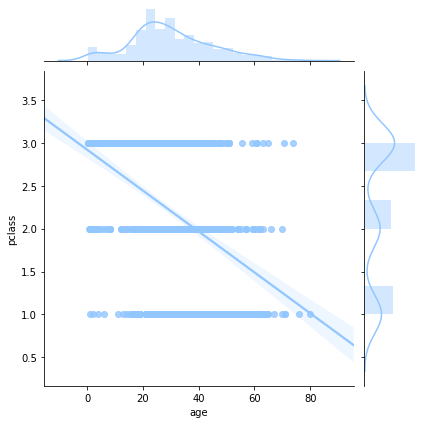

In [443]:
sns.jointplot(x='age', y='pclass', data=df1, kind='reg')

In [457]:
from scipy.stats import pearsonr

In [467]:
# Jätetään jäljelle vain kiinnostavat numeeriset arvot

df_dropna = df1.drop(['Class', 'Survived_YN', 'Age_Class', 'name', 'cabin', 'home.dest'], axis=1)

In [468]:
df_dropna.head()

,pclass,survived,age,sex,fare
0,1,1,29.0000,1,211.3375
1,1,1,0.9167,2,151.5500
2,1,0,2.0000,1,151.5500
3,1,0,30.0000,2,151.5500
4,1,0,25.0000,1,151.5500


In [469]:
# Poistan puuttuvat arvot, jotta voin suorittaa loput testit

df1_dropna = df_dropna.dropna(subset=['pclass', 'survived', 'age', 'sex', 'fare'])

In [470]:
# Pearsonin korrelaatio matkustajaluokan mukaan, kaikki tulokset ovat merkitseviä..

from scipy.stats import pearsonr

for var in df1_dropna:
    print(var, pearsonr(df1_dropna['age'], df1_dropna[var]))

pclass (-0.41108587684671793, 7.095202874660229e-44)
survived (-0.05395784288672295, 0.08125528254926705)
age (1.0, 0.0)
sex (0.06223607057788909, 0.044281741850552093)
fare (0.17873932314646118, 5.955355439005716e-09)


In [471]:
# Pearsonin korrelaatio sukupuolen mukaan

from scipy.stats import pearsonr

for var in df1_dropna:
    print(var, pearsonr(df1_dropna['sex'], df1_dropna[var]))

pclass (0.14410474358251296, 2.907424191366281e-06)
survived (-0.5377190151247995, 2.3225482484453323e-79)
age (0.06223607057788909, 0.044281741850552093)
sex (0.9999999999999998, 0.0)
fare (-0.18792965069631615, 9.214214327658383e-10)


In [472]:
from scipy.stats import pearsonr

for var in df1_dropna:
    print(var, pearsonr(df1_dropna['age'], df1_dropna[var]))

pclass (-0.41108587684671793, 7.095202874660229e-44)
survived (-0.05395784288672295, 0.08125528254926705)
age (1.0, 0.0)
sex (0.06223607057788909, 0.044281741850552093)
fare (0.17873932314646118, 5.955355439005716e-09)


NameError: name 'df6' is not defined

In [ ]:
# Lopetan tähän, ainakin tehty mitä opetusvideoilla on ollut. Tuli myös painittua vähän omien juttujenkin kanssa, mutta
# väitän, että löysin ratkaisut ihan hyvin. Näistä notebookeista taitaa tulla aika pitkiä, kerro jos haluat että pätkin.

# Senkin opin, etteivät Jack ja Rose Titanic-leffasta olleet oikeita henkilöitä :D